<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Libraries" data-toc-modified-id="Read-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Libraries</a></span></li><li><span><a href="#Read-and-plot-the-image" data-toc-modified-id="Read-and-plot-the-image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and plot the image</a></span></li><li><span><a href="#Convert-to-gray-scale" data-toc-modified-id="Convert-to-gray-scale-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convert to gray scale</a></span></li><li><span><a href="#Add-cascade-objects" data-toc-modified-id="Add-cascade-objects-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add cascade objects</a></span></li><li><span><a href="#Identify-face" data-toc-modified-id="Identify-face-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Identify face</a></span></li><li><span><a href="#Identify-Eyes" data-toc-modified-id="Identify-Eyes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Identify Eyes</a></span></li></ul></div>

## Read Libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## Read and plot the image

In [52]:
img = cv2.imread('./test_images/170828_maria_sharapova.jpg', 1)
img.shape

(1320, 1980, 3)

In [53]:
# cv2.imshow('Image', img)
# cv2.waitKey()
# cv2.destroyAllWindows()

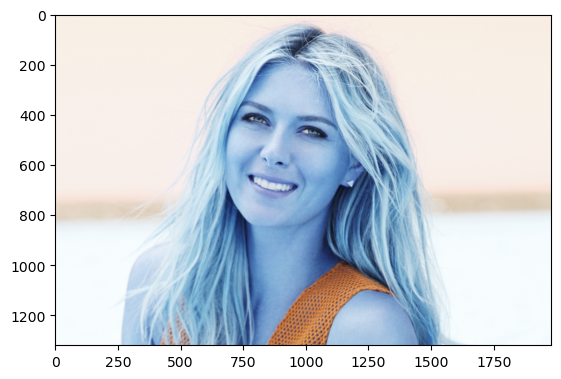

In [54]:
plt.imshow(img)

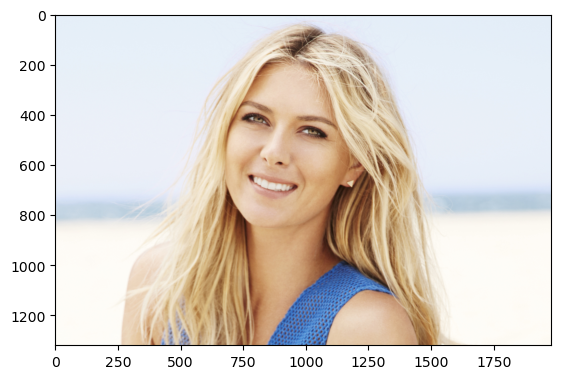

In [55]:
"""
The problem is that opencv uses bgr color mode and matplotlib uses rgb color mode. 
Therefore the red and blue color channels are switched.

You can easily fix that problem by proving matplotlib an rgb image or by using cv2.imshow function.
"""

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb, cmap = plt.cm.Spectral) 

# cv2.imshow('image',img)

## Convert to gray scale

In [56]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(1320, 1980)

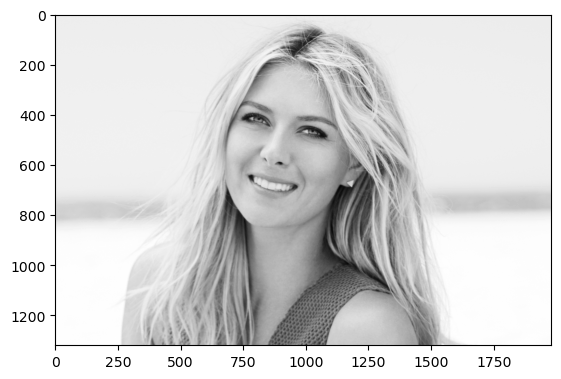

In [57]:
plt.imshow(img_gray, cmap = 'gray')

## Add cascade objects

In [58]:
face_cascade = cv2.CascadeClassifier('.\opencv\data\haarcascades_cuda\haarcascade_frontalface_default.xml')  # pre-trained classifiers
eye_cascade = cv2.CascadeClassifier('.\opencv\data\haarcascades_cuda\haarcascade_eye_tree_eyeglasses.xml')



## Identify face 

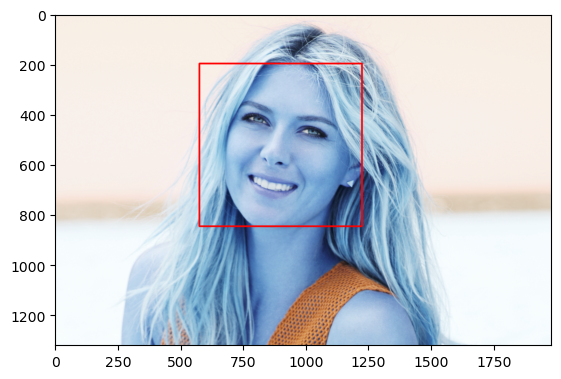

In [59]:
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
faces
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),5)
plt.imshow(face_img)

## Identify Eyes

In [62]:
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0) , 5)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        eyes_img = cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 5)
#     cv2.imshow("Image",face_img)
#     cv2.waitKey()

# cv2.destroyAllWindows()
       

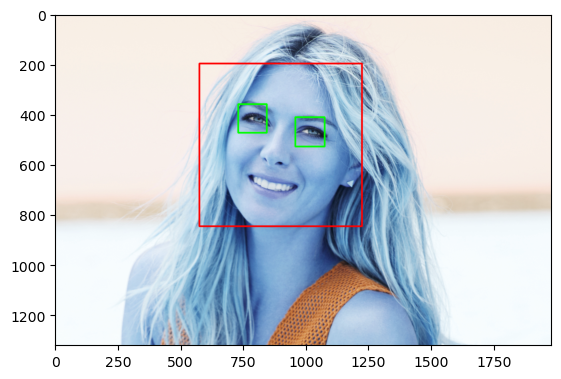

In [63]:
plt.imshow(img)


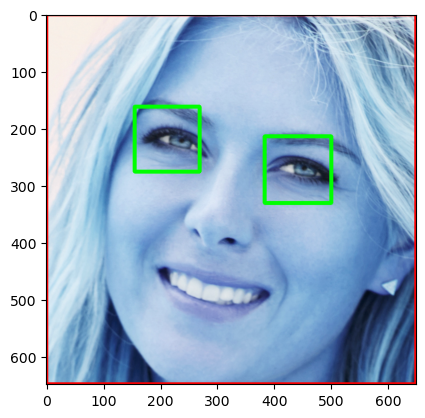

In [64]:
plt.imshow(roi_color)